<AxesSubplot:title={'center':'2330_stock_month.csv'}, xlabel='日期'>

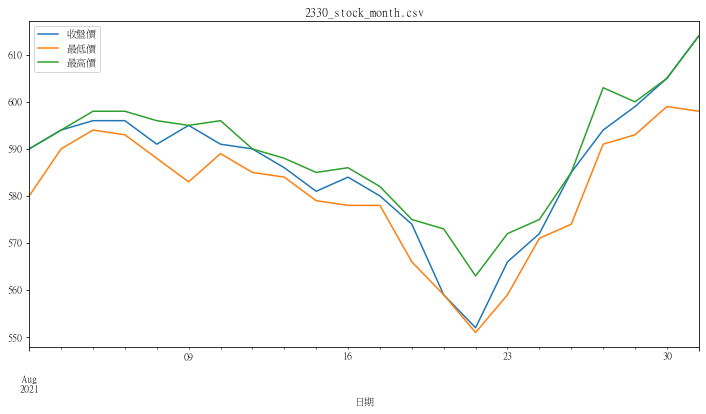

In [13]:
def convertDate(date):
    date_str=str(date)
    year_str=date_str[:3]
    realYear=str(int(year_str)+1911)
    realDate=realYear+date_str[4:6]+date_str[7:9]
    return realDate
import requests,re
import json,csv
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]="mingliu" #中文字型
plt.rcParams["axes.unicode_minus"]=False

pd.options.mode.chained_assignment=None

file_path='stock_month.csv'

if not os.path.isfile(file_path):
    url_twse='https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20210801&stockNo=2330&_=1670560076969'
    res=requests.get(url_twse)
    json_data=json.loads(res.text)
    titleFor=re.search('\d{4}',json_data['title']).group()
    file_path=titleFor+"_"+file_path
    outputFile=open(file_path,'w',newline='',encoding='UTF-8')
    outputWriter=csv.writer(outputFile)
    outputWriter.writerow(json_data['fields'])
    
    for dataLine in (json_data['data']):
        outputWriter.writerow(dataLine)
    outputFile.close()

pdstock=pd.read_csv(file_path,encoding='UTF-8')
for i in range(len(pdstock['日期'])):
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期']=pd.to_datetime(pdstock['日期'])
df_plot=pdstock.plot(kind='line',figsize=(12,6),x="日期",y=["收盤價","最低價","最高價"],title=file_path) #畫統計圖
df_plot